
# Demonstration of k-means 

This example is meant to illustrate situations where k-means produces
unintuitive and possibly undesirable clusters.


In [1]:
# Adapted from
# Author: Phil Roth <mr.phil.roth@gmail.com>
#         Arturo Amor <david-arturo.amor-quiroz@inria.fr>
# License: BSD 3 clause

## Data generation

The function :func:`~sklearn.datasets.make_blobs` generates isotropic
(spherical) gaussian blobs. To obtain anisotropic (elliptical) gaussian blobs
one has to define a linear `transformation`.



In [11]:
import numpy as np

from sklearn.datasets import make_blobs, make_circles, make_moons

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

X_cir, y_cir = make_circles(n_samples=n_samples, noise=0.1, random_state=random_state, factor=0.5)
X_moon, y_moon = make_moons(n_samples=n_samples, noise=0.1, random_state=random_state)


We can visualize the resulting data:



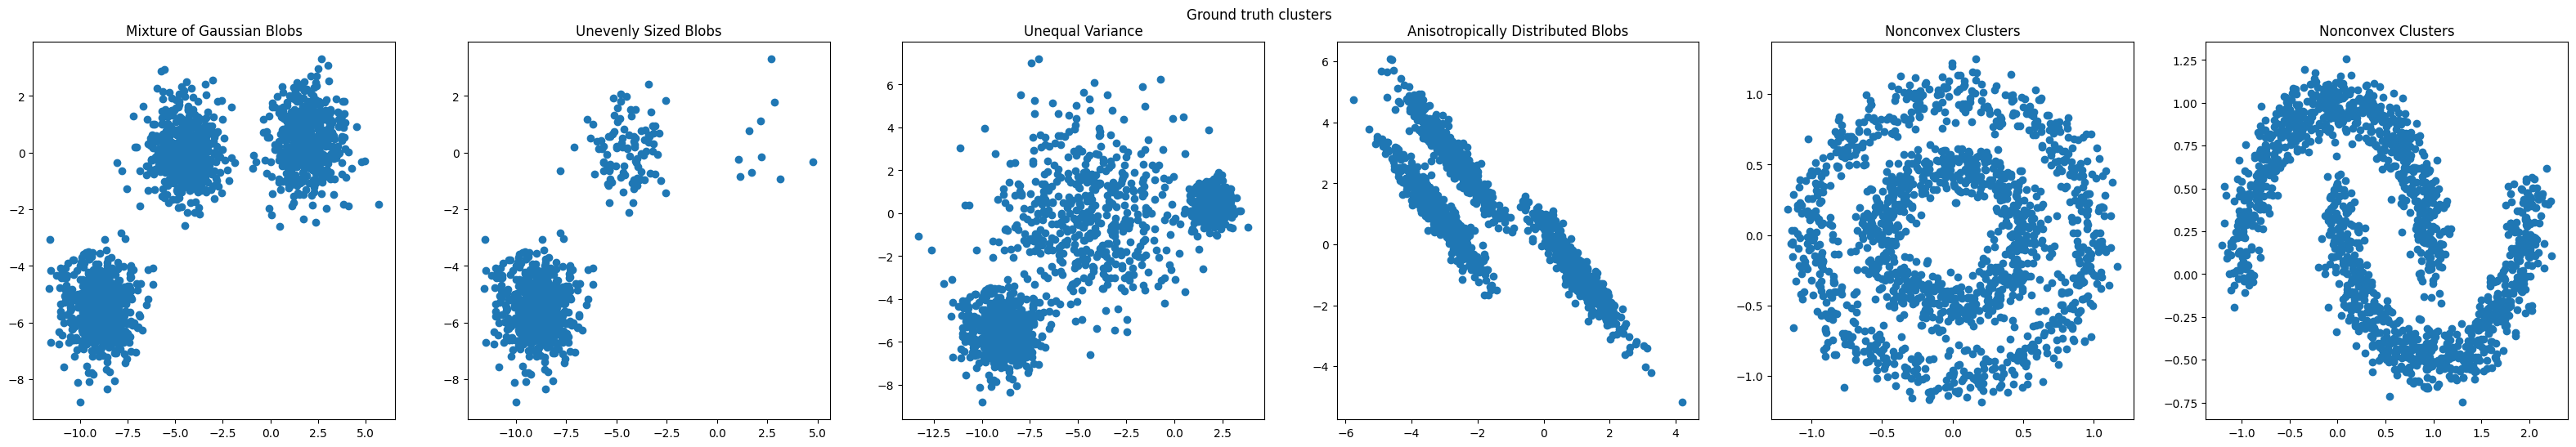

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(40, 6))

axs[0].scatter(X[:, 0], X[:, 1])
axs[0].set_title("Mixture of Gaussian Blobs")

axs[3].scatter(X_aniso[:, 0], X_aniso[:, 1])
axs[3].set_title("Anisotropically Distributed Blobs")

axs[2].scatter(X_varied[:, 0], X_varied[:, 1])
axs[2].set_title("Unequal Variance")

axs[1].scatter(X_filtered[:, 0], X_filtered[:, 1])
axs[1].set_title("Unevenly Sized Blobs")

axs[4].scatter(X_cir[:, 0], X_cir[:, 1])
axs[4].set_title("Nonconvex Clusters")

axs[5].scatter(X_moon[:, 0], X_moon[:, 1])
axs[5].set_title("Nonconvex Clusters")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

## Fit models and plot results

The previously generated data is now used to show how
:class:`~sklearn.cluster.KMeans` behaves in the following scenarios:

- Non-optimal number of clusters: in a real setting there is no uniquely
  defined **true** number of clusters. An appropriate number of clusters has
  to be decided from data-based criteria and knowledge of the intended goal.
- Anisotropically distributed blobs: k-means consists of minimizing sample's
  euclidean distances to the centroid of the cluster they are assigned to. As
  a consequence, k-means is more appropriate for clusters that are isotropic
  and normally distributed (i.e. spherical gaussians).
- Unequal variance: k-means is equivalent to taking the maximum likelihood
  estimator for a "mixture" of k gaussian distributions with the same
  variances but with possibly different means.
- Unevenly sized blobs: there is no theoretical result about k-means that
  states that it requires similar cluster sizes to perform well, yet
  minimizing euclidean distances does mean that the more sparse and
  high-dimensional the problem is, the higher is the need to run the algorithm
  with different centroid seeds to ensure a global minimal inertia.



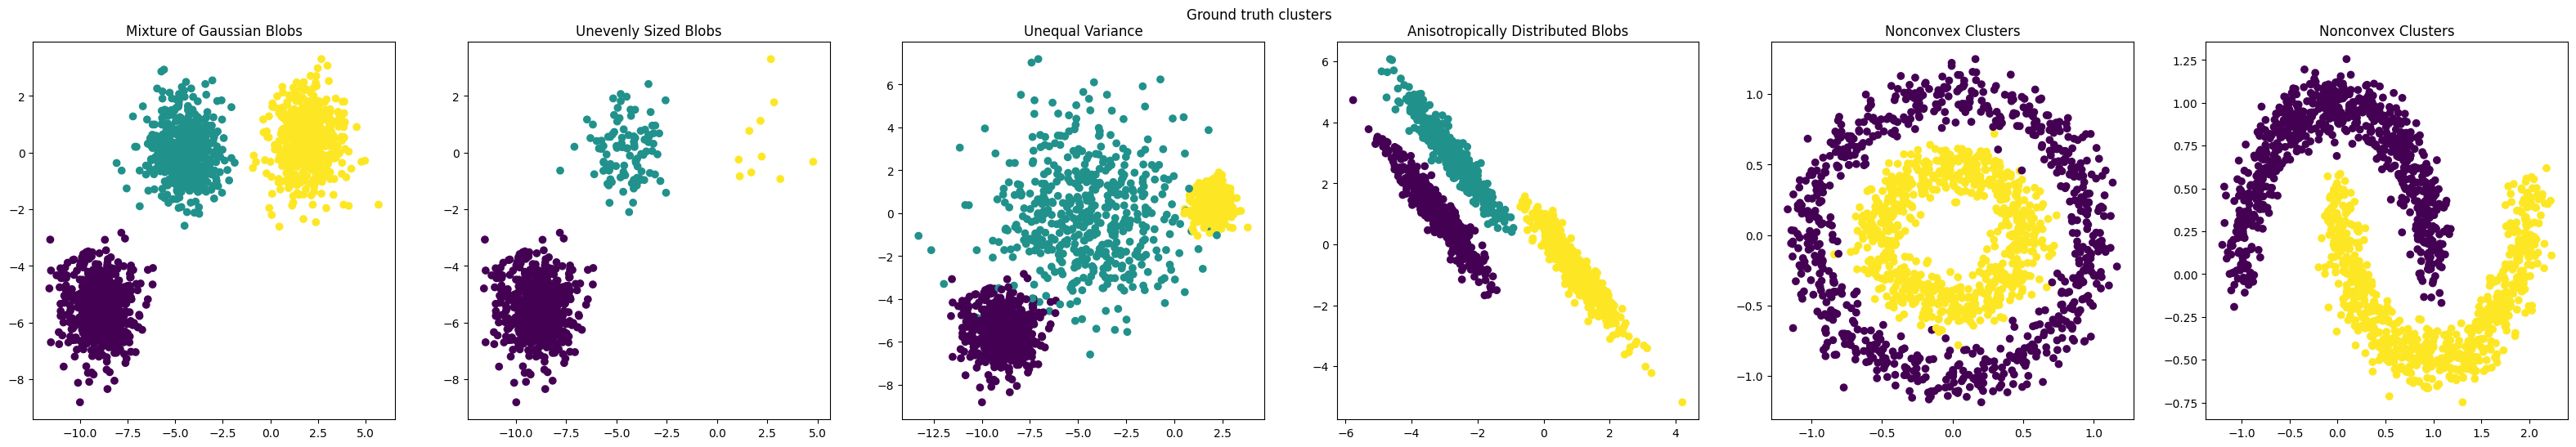

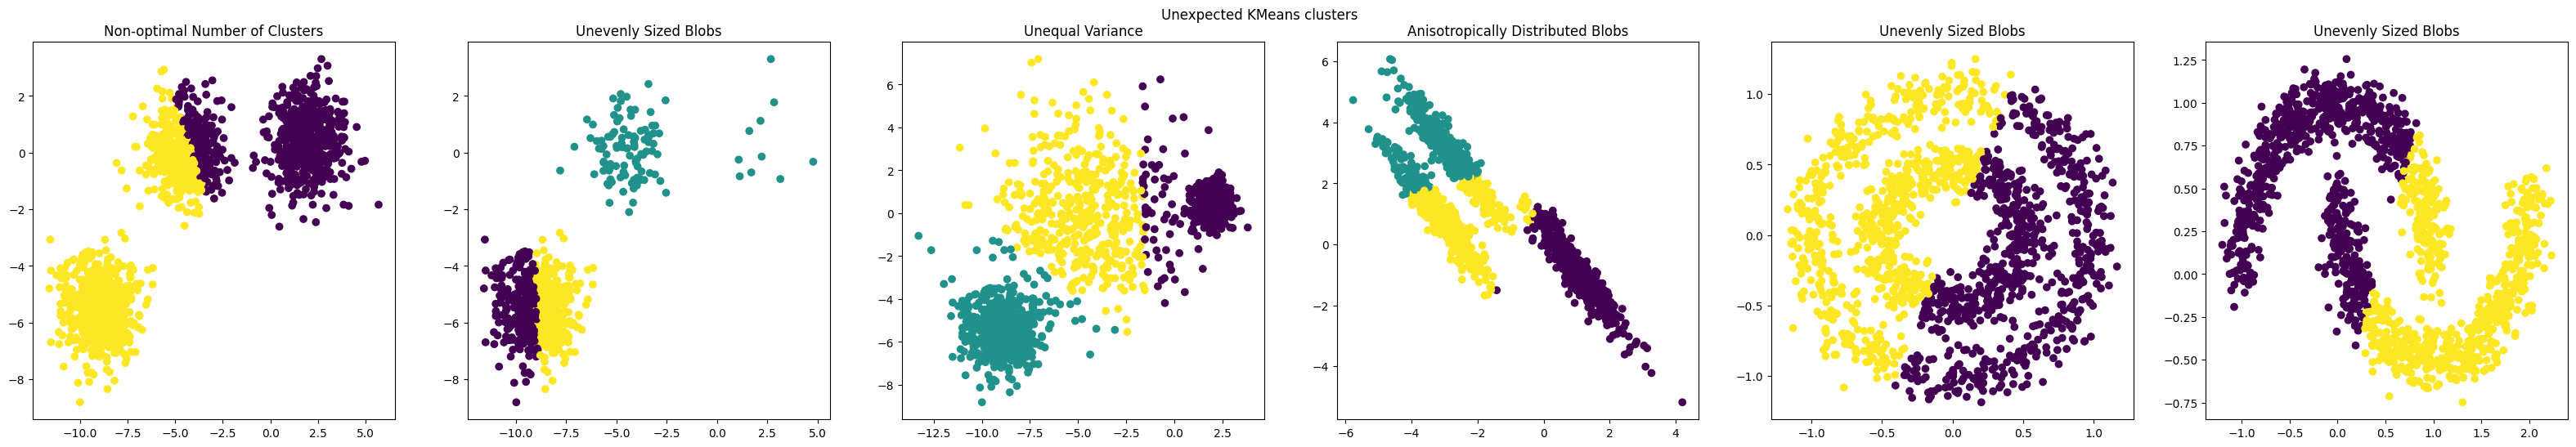

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(40, 6))

axs[0].scatter(X[:, 0], X[:, 1], c=y)
axs[0].set_title("Mixture of Gaussian Blobs")

axs[3].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[3].set_title("Anisotropically Distributed Blobs")

axs[2].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[2].set_title("Unequal Variance")

axs[1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1].set_title("Unevenly Sized Blobs")

axs[4].scatter(X_cir[:, 0], X_cir[:, 1], c=y_cir)
axs[4].set_title("Nonconvex Clusters")

axs[5].scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon)
axs[5].set_title("Nonconvex Clusters")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

from sklearn.cluster import KMeans

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(40, 6))

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
axs[0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0].set_title("Non-optimal Number of Clusters")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
axs[3].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[3].set_title("Anisotropically Distributed Blobs")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied)
axs[2].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[2].set_title("Unequal Variance")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_filtered)
axs[1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1].set_title("Unevenly Sized Blobs")

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X_cir)
axs[4].scatter(X_cir[:, 0], X_cir[:, 1], c=y_pred)
axs[4].set_title("Unevenly Sized Blobs")

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X_moon)
axs[5].scatter(X_moon[:, 0], X_moon[:, 1], c=y_pred)
axs[5].set_title("Unevenly Sized Blobs")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)
plt.show()

## Possible solutions

For an example on how to find a correct number of blobs, see
`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
In this case it suffices to set `n_clusters=3`.



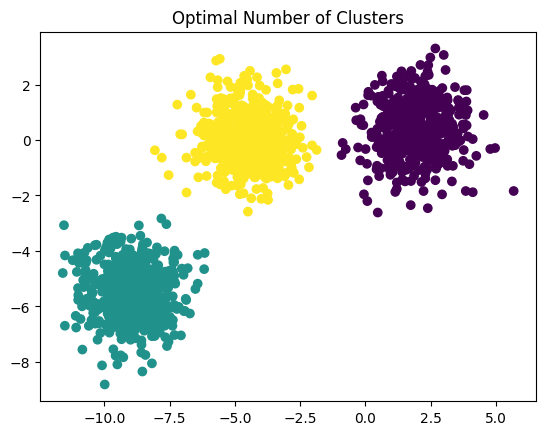

In [5]:
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

To deal with unevenly sized blobs one can increase the number of random
initializations. In this case we set `n_init=10` to avoid finding a
sub-optimal local minimum. For more details see `kmeans_sparse_high_dim`.



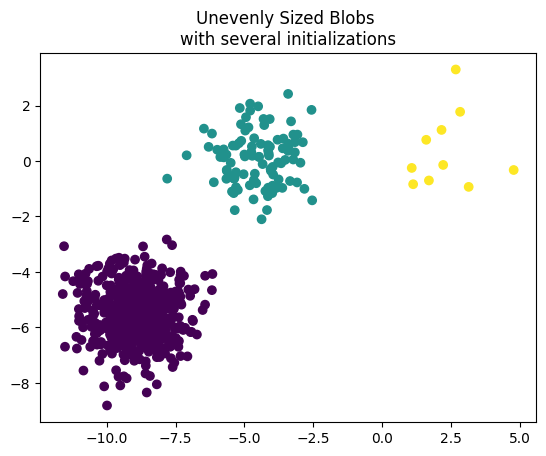

In [6]:
y_pred = KMeans(n_clusters=3, n_init=10, random_state=random_state).fit_predict(
    X_filtered
)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs \nwith several initializations")
plt.show()

As anisotropic and unequal variances are real limitations of the k-means
algorithm, here we propose instead the use of
:class:`~sklearn.mixture.GaussianMixture`, which also assumes gaussian
clusters but does not impose any constraints on their variances. Notice that
one still has to find the correct number of blobs (see
`sphx_glr_auto_examples_mixture_plot_gmm_selection.py`).

For an example on how other clustering methods deal with anisotropic or
unequal variance blobs, see the example
`sphx_glr_auto_examples_cluster_plot_cluster_comparison.py`.



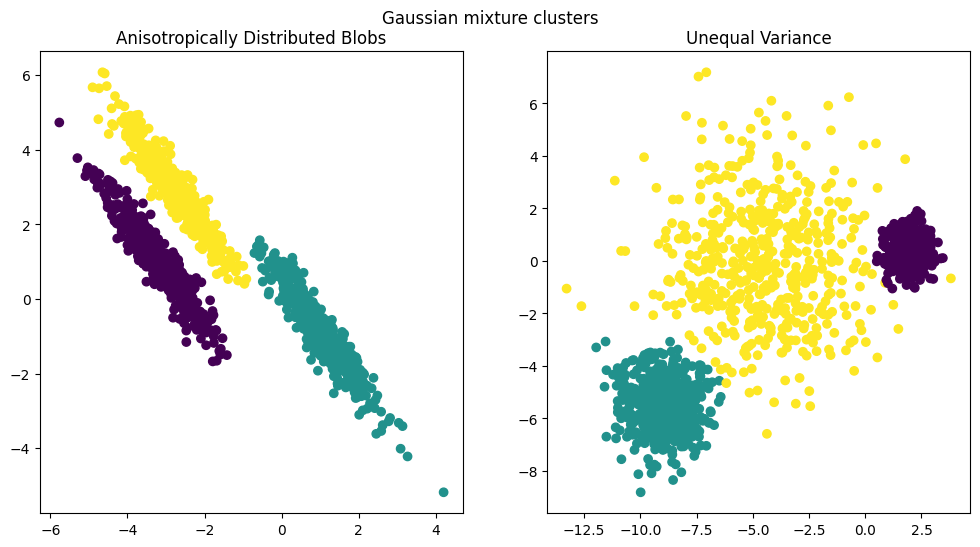

In [7]:
from sklearn.mixture import GaussianMixture

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

y_pred = GaussianMixture(n_components=3).fit_predict(X_aniso)
ax1.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
ax1.set_title("Anisotropically Distributed Blobs")

y_pred = GaussianMixture(n_components=3).fit_predict(X_varied)
ax2.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
ax2.set_title("Unequal Variance")

plt.suptitle("Gaussian mixture clusters").set_y(0.95)
plt.show()

## Final remarks

In high-dimensional spaces, Euclidean distances tend to become inflated
(not shown in this example). Running a dimensionality reduction algorithm
prior to k-means clustering can alleviate this problem and speed up the
computations (see the example
`sphx_glr_auto_examples_text_plot_document_clustering.py`).

In the case where clusters are known to be isotropic, have similar variance
and are not too sparse, the k-means algorithm is quite effective and is one of
the fastest clustering algorithms available. This advantage is lost if one has
to restart it several times to avoid convergence to a local minimum.

